# Attrition Prediction IA Project

## Chargement des librairies et configuration des paramètres d'affichage

In [ ]:
import numpy as np
import pandas as pd
import warnings
import zipfile
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Configuring display settings
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings("ignore", category=FutureWarning)

## Chargement et exploration des données

In [ ]:
# Path to the dataset
src_path = "src"
general_data_file_path = os.path.join(src_path, "general_data.csv")
employee_survey_data_file_path = os.path.join(src_path, "employee_survey_data.csv")
manager_survey_data_file_path = os.path.join(src_path, "manager_survey_data.csv")
in_out_time_file_path = os.path.join(src_path, "in_out_time.zip")

# Unzip the dataset from in_out_time.zip
with zipfile.ZipFile(in_out_time_file_path, 'r') as zip_ref:
    zip_ref.extractall(src_path)

# Load the dataset
general_data = pd.read_csv(general_data_file_path)
employee_survey_data = pd.read_csv(employee_survey_data_file_path)
manager_survey_data = pd.read_csv(manager_survey_data_file_path)
in_time_data = pd.read_csv(os.path.join(src_path, "in_time.csv"))
out_time_data = pd.read_csv(os.path.join(src_path, "out_time.csv"))

# set into a dictionary
data = {
    'general_data': general_data,
    'employee_survey_data': employee_survey_data,
    'manager_survey_data': manager_survey_data,
    'in_time_data': in_time_data,
    'out_time_data': out_time_data
}

## Afficher les informations générales des jeux de données

In [ ]:
for key, value in data.items():
    print(key)
    print(value.info())
    print()

general_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompanie

## Afficher les statistiques descriptives du jeu de données

In [ ]:
general_data.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.00,4410,4410,4410,4410.00,4410.00,4410,4410.00,4410.00,4410,4410.00,4410,4410,4410.00,4391.00,4410,4410.00,4410.00,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,NaN,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3699,3129,2883,NaN,NaN,1818,NaN,NaN,2646,NaN,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.92,NaN,NaN,NaN,9.19,2.91,NaN,1.00,2205.50,NaN,2.06,NaN,NaN,65029.31,2.69,NaN,15.21,8.00,0.79,11.28,2.80,7.01,2.19,4.12
std,9.13,NaN,NaN,NaN,8.11,1.02,NaN,0.00,1273.20,NaN,1.11,NaN,NaN,47068.89,2.50,NaN,3.66,0.00,0.85,7.78,1.29,6.13,3.22,3.57
min,18.00,NaN,NaN,NaN,1.00,1.00,NaN,1.00,1.00,NaN,1.00,NaN,NaN,10090.00,0.00,NaN,11.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,NaN,NaN,NaN,2.00,2.00,NaN,1.00,1103.25,NaN,1.00,NaN,NaN,29110.00,1.00,NaN,12.00,8.00,0.00,6.00,2.00,3.00,0.00,2.00
50%,36.00,NaN,NaN,NaN,7.00,3.00,NaN,1.00,2205.50,NaN,2.00,NaN,NaN,49190.00,2.00,NaN,14.00,8.00,1.00,10.00,3.00,5.00,1.00,3.00
75%,43.00,NaN,NaN,NaN,14.00,4.00,NaN,1.00,3307.75,NaN,3.00,NaN,NaN,83800.00,4.00,NaN,18.00,8.00,1.00,15.00,3.00,9.00,3.00,7.00


In [ ]:
employee_survey_data.describe(include='all')

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.00,4385.00,4390.00,4372.00
mean,2205.50,2.72,2.73,2.76
std,1273.20,1.09,1.10,0.71
min,1.00,1.00,1.00,1.00
25%,1103.25,2.00,2.00,2.00
50%,2205.50,3.00,3.00,3.00
75%,3307.75,4.00,4.00,3.00
max,4410.00,4.00,4.00,4.00


In [ ]:
manager_survey_data.describe(include='all')

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.00,4410.00,4410.00
mean,2205.50,2.73,3.15
std,1273.20,0.71,0.36
min,1.00,1.00,3.00
25%,1103.25,2.00,3.00
50%,2205.50,3.00,3.00
75%,3307.75,3.00,3.00
max,4410.00,4.00,4.00


In [ ]:
in_time_data.describe(include='all')

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
count,4410.00,0.00,4201,4204,4182,4201,4167,4195,4171,4145,0.00,4174,4146,4182,4169,4170,4170,4161,0.00,4193,4198,4134,4202,4202,4204,4198,4199,4199,4186,4191,4184,4174,4198,4188,4166,4181,4193,4198,4169,4184,4176,4172,4174,4156,4182,4179,0.00,4168,4178,4167,4178,4191,4219,4191,4179,4173,4171,4187,4203,4193,4207,4192,4175,4188,4199,4192,4207,4176,4176,4186,4171,4178,4192,4197,4203,4182,4196,4187,4175,4170,4213,4188,4190,4159,4195,4172,4197,0.00,4206,4191,4177,4187,4179,4181,4181,4197,4198,4203,4180,4193,4182,4183,4165,4173,4190,4189,4188,4175,4189,4169,4199,4182,4207,4179,4206,4183,4199,4186,4179,4164,4184,4195,4185,4179,4166,4173,4161,4179,4176,4163,4185,4189,4189,4194,4194,4220,4211,4180,4201,4179,4188,4182,0.00,4197,4199,4198,4167,4172,4205,4198,4206,4184,4206,4190,4202,4204,4186,4178,4213,4173,4155,4165,4174,4180,4216,4177,4190,4191,4192,4172,4195,4209,4202,4184,4187,4178,4186,4180,4179,4165,4184,4206,4198,4166,4200,4190,0.00,4208,4180,4175,4194,4166,4170,4193,4191,4191,4191,0.00,4160,4193,4183,4166,4181,4177,4179,4187,4177,4186,4177,4172,4181,4175,4193,4178,4196,4197,4210,4180,4164,4199,4181,416

In [ ]:
out_time_data.describe(include='all')

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
count,4410.00,0.00,4201,4204,4182,4201,4167,4195,4171,4145,0.00,4174,4146,4182,4169,4170,4170,4161,0.00,4193,4198,4134,4202,4202,4204,4198,4199,4199,4186,4191,4184,4174,4198,4188,4166,4181,4193,4198,4169,4184,4176,4172,4174,4156,4182,4179,0.00,4168,4178,4167,4178,4191,4219,4191,4179,4173,4171,4187,4203,4193,4207,4192,4175,4188,4199,4192,4207,4176,4176,4186,4171,4178,4192,4197,4203,4182,4196,4187,4175,4170,4213,4188,4190,4159,4195,4172,4197,0.00,4206,4191,4177,4187,4179,4181,4181,4197,4198,4203,4180,4193,4182,4183,4165,4173,4190,4189,4188,4175,4189,4169,4199,4182,4207,4179,4206,4183,4199,4186,4179,4164,4184,4195,4185,4179,4166,4173,4161,4179,4176,4163,4185,4189,4189,4194,4194,4220,4211,4180,4201,4179,4188,4182,0.00,4197,4199,4198,4167,4172,4205,4198,4206,4184,4206,4190,4202,4204,4186,4178,4213,4173,4155,4165,4174,4180,4216,4177,4190,4191,4192,4172,4195,4209,4202,4184,4187,4178,4186,4180,4179,4165,4184,4206,4198,4166,4200,4190,0.00,4208,4180,4175,4194,4166,4170,4193,4191,4191,4191,0.00,4160,4193,4183,4166,4181,4177,4179,4187,4177,4186,4177,4172,4181,4175,4193,4178,4196,4197,4210,4180,4164,4199,4181,416

## Correction des noms de colonnes

Nous constatons que la première colonne des jeux de données in_time_data et out_time_data est nommée Unnamed: 0. Nous allons la renommer en EmployeeID pour une meilleure lisibilité.

In [ ]:
# Replace Unnamed header by EmployeeID
in_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)

## Afficher les premières lignes du jeu de données

In [ ]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.00,Y,11,8,0,1.00,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.00,Y,23,8,1,6.00,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.00,Y,15,8,3,5.00,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.00,Y,11,8,3,13.00,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.00,Y,12,8,2,9.00,2,6,0,4


In [ ]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.00,4.00,2.00
1,2,3.00,2.00,4.00
2,3,2.00,2.00,1.00
3,4,4.00,4.00,3.00
4,5,4.00,1.00,3.00


In [ ]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
in_time_data.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [ ]:
out_time_data.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

## Nombre de valeur par état d'attrition

In [ ]:
general_data['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

## Création du dataframe merged_data

Nous allons maintenant créer un dataframe qui contient toute les données des autres dataframes afin de manipuler plus facilement les données et de créer plus facilement des dataframe contenant uniquement les données que nous voulons tester.

In [ ]:
# Ajout de prefix pour différencier les heures de sortie et celle d'entrée

in_time_data.columns = [
    f"In_{col}" if col != "EmployeeID" else col
    for col in in_time_data.columns
]

out_time_data.columns = [
    f"Out_{col}" if col != "EmployeeID" else col
    for col in out_time_data.columns
]

in_time_data.head()

,EmployeeID,In_2015-01-01,In_2015-01-02,In_2015-01-05,In_2015-01-06,In_2015-01-07,In_2015-01-08,In_2015-01-09,In_2015-01-12,In_2015-01-13,In_2015-01-14,In_2015-01-15,In_2015-01-16,In_2015-01-19,In_2015-01-20,In_2015-01-21,In_2015-01-22,In_2015-01-23,In_2015-01-26,In_2015-01-27,In_2015-01-28,In_2015-01-29,In_2015-01-30,In_2015-02-02,In_2015-02-03,In_2015-02-04,In_2015-02-05,In_2015-02-06,In_2015-02-09,In_2015-02-10,In_2015-02-11,In_2015-02-12,In_2015-02-13,In_2015-02-16,In_2015-02-17,In_2015-02-18,In_2015-02-19,In_2015-02-20,In_2015-02-23,In_2015-02-24,In_2015-02-25,In_2015-02-26,In_2015-02-27,In_2015-03-02,In_2015-03-03,In_2015-03-04,In_2015-03-05,In_2015-03-06,In_2015-03-09,In_2015-03-10,In_2015-03-11,In_2015-03-12,In_2015-03-13,In_2015-03-16,In_2015-03-17,In_2015-03-18,In_2015-03-19,In_2015-03-20,In_2015-03-23,In_2015-03-24,In_2015-03-25,In_2015-03-26,In_2015-03-27,In_2015-03-30,In_2015-03-31,In_2015-04-01,In_2015-04-02,In_2015-04-03,In_2015-04-06,In_2015-04-07,In_2015-04-08,In_2015-04-09,In_2015-04-10,In_2015-04-13,In_2015-04-14,In_2015-04-15,In_2015-04-16,In_2015-04-17,In_2015-04-20,In_2015-04-21,In_2015-04-22,In_2015-04-23,In_2015-04-24,In_2015-04-27,In_2015-04-28,In_2015-04-29,In_2015-04-30,In_2015-05-01,In_2015-05-04,In_2015-05-05,In_2015-05-06,In_2015-05-07,In_2015-05-08,In_2015-05-11,In_2015-05-12,In_2015-05-13,In_2015-05-14,In_2015-05-15,In_2015-05-18,In_2015-05-19,In_2015-05-20,In_2015-05-21,In_2015-05-22,In_2015-05-25,In_2015-05-26,In_2015-05-27,In_2015-05-28,In_2015-05-29,In_2015-06-01,In_2015-06-02,In_2015-06-03,In_2015-06-04,In_2015-06-05,In_2015-06-08,In_2015-06-09,In_2015-06-10,In_2015-06-11,In_2015-06-12,In_2015-06-15,In_2015-06-16,In_2015-06-17,In_2015-06-18,In_2015-06-19,In_2015-06-22,In_2015-06-23,In_2015-06-24,In_2015-06-25,In_2015-06-26,In_2015-06-29,In_2015-06-30,In_2015-07-01,In_2015-07-02,In_2015-07-03,In_2015-07-06,In_2015-07-07,In_2015-07-08,In_2015-07-09,In_2015-07-10,In_2015-07-13,In_2015-07-14,In_2015-07-15,In_2015-07-16,In_2015-07-17,In_2015-07-20,In_2015-07-21,In_2015-07-22,In_2015-07-23,In_2015-07-24,In_2015-07-27,In_2015-07-28,In_2015-07-29,In_2015-07-30,In_2015-07-31,In_2015-08-03,In_2015-08-04,In_2015-08-05,In_2015-08-06,In_2015-08-07,In_2015-08-10,In_2015-08-11,In_2015-08-12,In_2015-08-13,In_2015-08-14,In_2015-08-17,In_2015-08-18,In_2015-08-19,In_2015-08-20,In_2015-08-21,In_2015-08-24,In_2015-08-25,In_2015-08-26,In_2015-08-27,In_2015-08-28,In_2015-08-31,In_2015-09-01,In_2015-09-02,In_2015-09-03,In_2015-09-04,In_2015-09-07,In_2015-09-08,In_2015-09-09,In_2015-09-10,In_2015-09-11,In_2015-09-14,In_2015-09-15,In_2015-09-16,In_2015-09-17,In_2015-09-18,In_2015-09-21,In_2015-09-22,In_2015-09-23,In_2015-09-24,In_2015-09-25,In_2015-09-28,In_2015-09-29,In_2015-09-30,In_2015-10-01,In_2015-10-02,In_2015-10-05,In_2015-10-06,In_2015-10-07,In_2015-10-08,In_2015-10-09,In_2015-10-12,In_2015-10-13,In_2015-10-14,In_2015-10-15,In_2015-10-16,In_2015-10-19,In_2015-10-20,In_2015-10-21,In_2015-10-22,In_2015-10-23,In_2015-10-26,In_2015-10-27,In_2015-10-28,In_2015-10-29,In_2015-10-30,In_2015-11-02,In_2015-11-03,In_2015-11-04,In_2015-11-05,In_2015-11-06,In_2015-11-09,In_2015-11-10,In_2015-11-11,In_2015-11-12,In_2015-11-13,In_2015-11-16,In_2015-11-17,In_2015-11-18,In_2015-11-19,In_2015-11-20,In_2015-11-23,In_2015-11-24,In_2015-11-25,In_2015-11-26,In_2015-11-27,In_2015-11-30,In_2015-12-01,In_2015-12-02,In_2015-12-03,In_2015-12-04,In_2015-12-07,In_2015-12-08,In_2015-12-09,In_2015-12-10,In_2015-12-11,In_2015-12-14,In_2015-12-15,In_2015-12-16,In_2015-12-17,In_2015-12-18,In_2015-12-21,In_2015-12-22,In_2015-12-23,In_2015-12-24,In_2015-12-25,In_2015-12-28,In_2015-12-29,In_2015-12-30,In_2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:

In [ ]:
# Fusion de tous les DataFrames sur la clé "EmployeeID"
merged_data = data['general_data']
for key, df in data.items():
    if key != 'general_data':
        merged_data = pd.merge(merged_data, df, on='EmployeeID', how='inner')

merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,In_2015-01-01,In_2015-01-02,In_2015-01-05,In_2015-01-06,In_2015-01-07,In_2015-01-08,In_2015-01-09,In_2015-01-12,In_2015-01-13,In_2015-01-14,In_2015-01-15,In_2015-01-16,In_2015-01-19,In_2015-01-20,In_2015-01-21,In_2015-01-22,In_2015-01-23,In_2015-01-26,In_2015-01-27,In_2015-01-28,In_2015-01-29,In_2015-01-30,In_2015-02-02,In_2015-02-03,In_2015-02-04,In_2015-02-05,In_2015-02-06,In_2015-02-09,In_2015-02-10,In_2015-02-11,In_2015-02-12,In_2015-02-13,In_2015-02-16,In_2015-02-17,In_2015-02-18,In_2015-02-19,In_2015-02-20,In_2015-02-23,In_2015-02-24,In_2015-02-25,In_2015-02-26,In_2015-02-27,In_2015-03-02,In_2015-03-03,In_2015-03-04,In_2015-03-05,In_2015-03-06,In_2015-03-09,In_2015-03-10,In_2015-03-11,In_2015-03-12,In_2015-03-13,In_2015-03-16,In_2015-03-17,In_2015-03-18,In_2015-03-19,In_2015-03-20,In_2015-03-23,In_2015-03-24,In_2015-03-25,In_2015-03-26,In_2015-03-27,In_2015-03-30,In_2015-03-31,In_2015-04-01,In_2015-04-02,In_2015-04-03,In_2015-04-06,In_2015-04-07,In_2015-04-08,In_2015-04-09,In_2015-04-10,In_2015-04-13,In_2015-04-14,In_2015-04-15,In_2015-04-16,In_2015-04-17,In_2015-04-20,In_2015-04-21,In_2015-04-22,In_2015-04-23,In_2015-04-24,In_2015-04-27,In_2015-04-28,In_2015-04-29,In_2015-04-30,In_2015-05-01,In_2015-05-04,In_2015-05-05,In_2015-05-06,In_2015-05-07,In_2015-05-08,In_2015-05-11,In_2015-05-12,In_2015-05-13,In_2015-05-14,In_2015-05-15,In_2015-05-18,In_2015-05-19,In_2015-05-20,In_2015-05-21,In_2015-05-22,In_2015-05-25,In_2015-05-26,In_2015-05-27,In_2015-05-28,In_2015-05-29,In_2015-06-01,In_2015-06-02,In_2015-06-03,In_2015-06-04,In_2015-06-05,In_2015-06-08,In_2015-06-09,In_2015-06-10,In_2015-06-11,In_2015-06-12,In_2015-06-15,In_2015-06-16,In_2015-06-17,In_2015-06-18,In_2015-06-19,In_2015-06-22,In_2015-06-23,In_2015-06-24,In_2015-06-25,In_2015-06-26,In_2015-06-29,In_2015-06-30,In_2015-07-01,In_2015-07-02,In_2015-07-03,In_2015-07-06,In_2015-07-07,In_2015-07-08,In_2015-07-09,In_2015-07-10,In_2015-07-13,In_2015-07-14,In_2015-07-15,In_2015-07-16,In_2015-07-17,In_2015-07-20,In_2015-07-21,In_2015-07-22,In_2015-07-23,In_2015-07-24,In_2015-07-27,In_2015-07-28,In_2015-07-29,In_2015-07-30,In_2015-07-31,In_2015-08-03,In_2015-08-04,In_2015-08-05,In_2015-08-06,In_2015-08-07,In_2015-08-10,In_2015-08-11,In_2015-08-12,In_2015-08-13,In_2015-08-14,In_2015-08-17,In_2015-08-18,In_2015-08-19,In_2015-08-20,In_2015-08-21,In_2015-08-24,In_2015-08-25,In_2015-08-26,In_2015-08-27,In_2015-08-28,In_2015-08-31,In_2015-09-01,In_2015-09-02,In_2015-09-03,In_2015-09-04,In_2015-09-07,In_2015-09-08,In_2015-09-09,In_2015-09-10,In_2015-09-11,In_2015-09-14,In_2015-09-15,In_2015-09-16,In_2015-09-17,In_2015-09-18,In_2015-09-21,In_2015-09-22,In_2015-09-23,In_2015-09-24,In_2015-09-25,In_2015-09-28,In_2015-09-29,In_2015-09-30,In_2015-10-01,In_2015-10-02,In_2015-10-05,In_2015-10-06,In_2015-10-07,In_2015-10-08,In_2015-10-09,In_2015-10-12,In_2015-10-13,In_2015-10-14,In_2015-10-15,In_2015-10-16,In_2015-10-19,In_2015-10-20,In_2015-10-21,In_2015-10-22,In_2015-10-23,In_2015-10-26,In_2015-10-27,In_2015-10-28,In_2015-10-29,In_2015-10-30,In_2015-11-02,In_2015-11-03,In_2015-11-04,In_2015-11-05,In_2015-11-06,In_2015-11-09,In_2015-11-10,In_2015-11-11,In_2015-11-12,In_2015-11-13,In_2015-11-16,In_2015-11-17,In_2015-11-18,In_2015-11-19,In_2015-11-20,In_2015-11-23,In_2015-11-24,In_2015-11-25,In_2015-11-26,In_2015-11-27,In_2015-11-30,In_2015-12-01,In_2015-12-02,In_2015-12-03,In_2015-12-04,In_2015-12-07,In_2015-12-08,In_2015-12-09,In_2015-12-10,In_2015-12-11,In_2015-12-14,In_2015-12-15,In_2015-12-16,In_2015-12-17,In_2015-12-18,In_2015-12-21,In_2015-12-22,In_2015-12-23,In_201

In [ ]:
# Vérifier la taille pour s'assurer qu'il y a bien le bon nombre d'employés
print(f"Nombre de lignes dans le DataFrame fusionné : {merged_data.shape[0]}")

Nombre de lignes dans le DataFrame fusionné : 4410


### Création du fichier csv qui contient le dataframe merged_data

In [ ]:
merged_data.to_csv('./src/merged_data.csv')

## Visualisation des données manquantes

### General Data

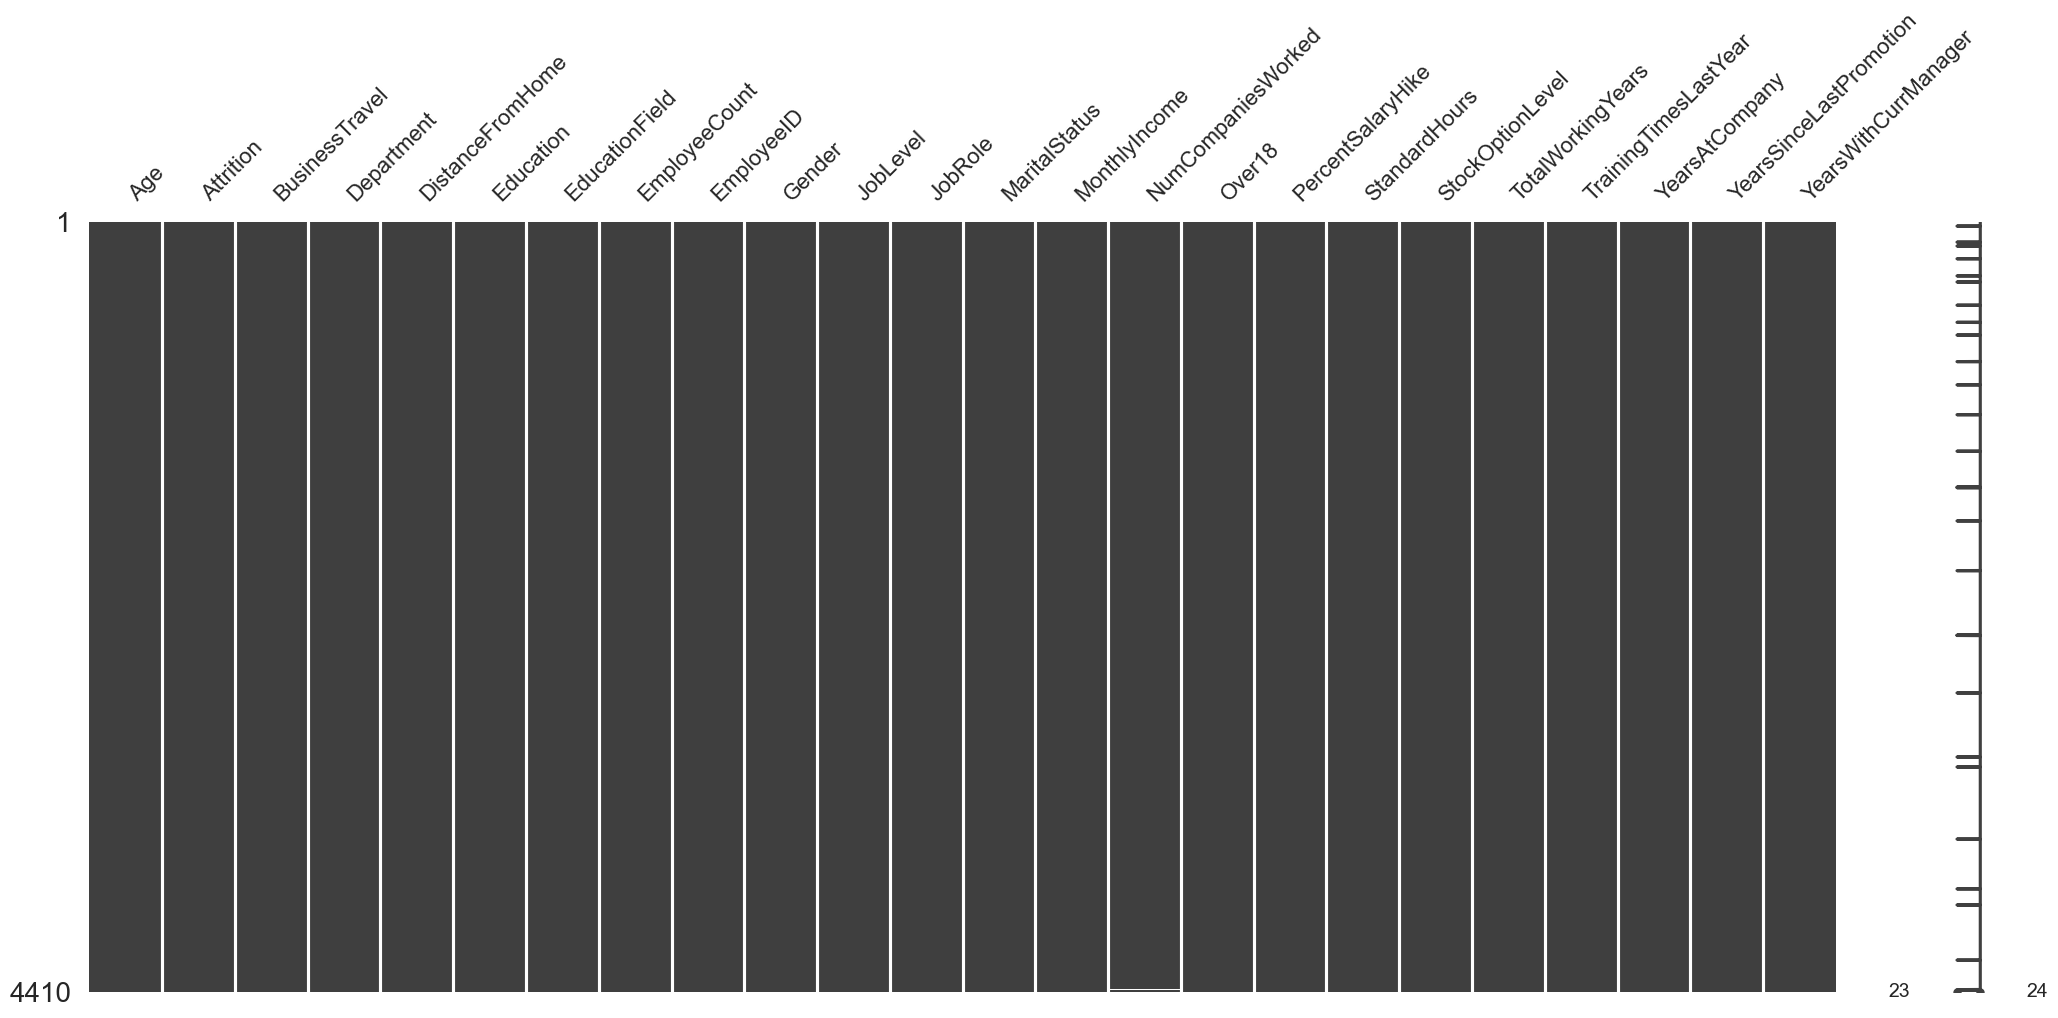

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
# Visualisation des données manquantes
msno.matrix(general_data)
plt.show()

# Imputer les valeurs manquantes
# Pour les variables numériques, on remplace les valeurs manquantes par la médiane
numerical_columns = general_data.select_dtypes(include=np.number).columns
general_data[numerical_columns] = general_data[numerical_columns].fillna(general_data[numerical_columns].median())

# Pour les variables catégorielles, on remplace les valeurs manquantes par le mode imputation
categorical_columns = general_data.select_dtypes(include='object').columns
general_data[categorical_columns] = general_data[categorical_columns].fillna(general_data[categorical_columns].mode().iloc[0])

# Vérification que toutes les valeurs manquantes ont été traitées
general_data.isnull().sum()

### Employee Survey Data

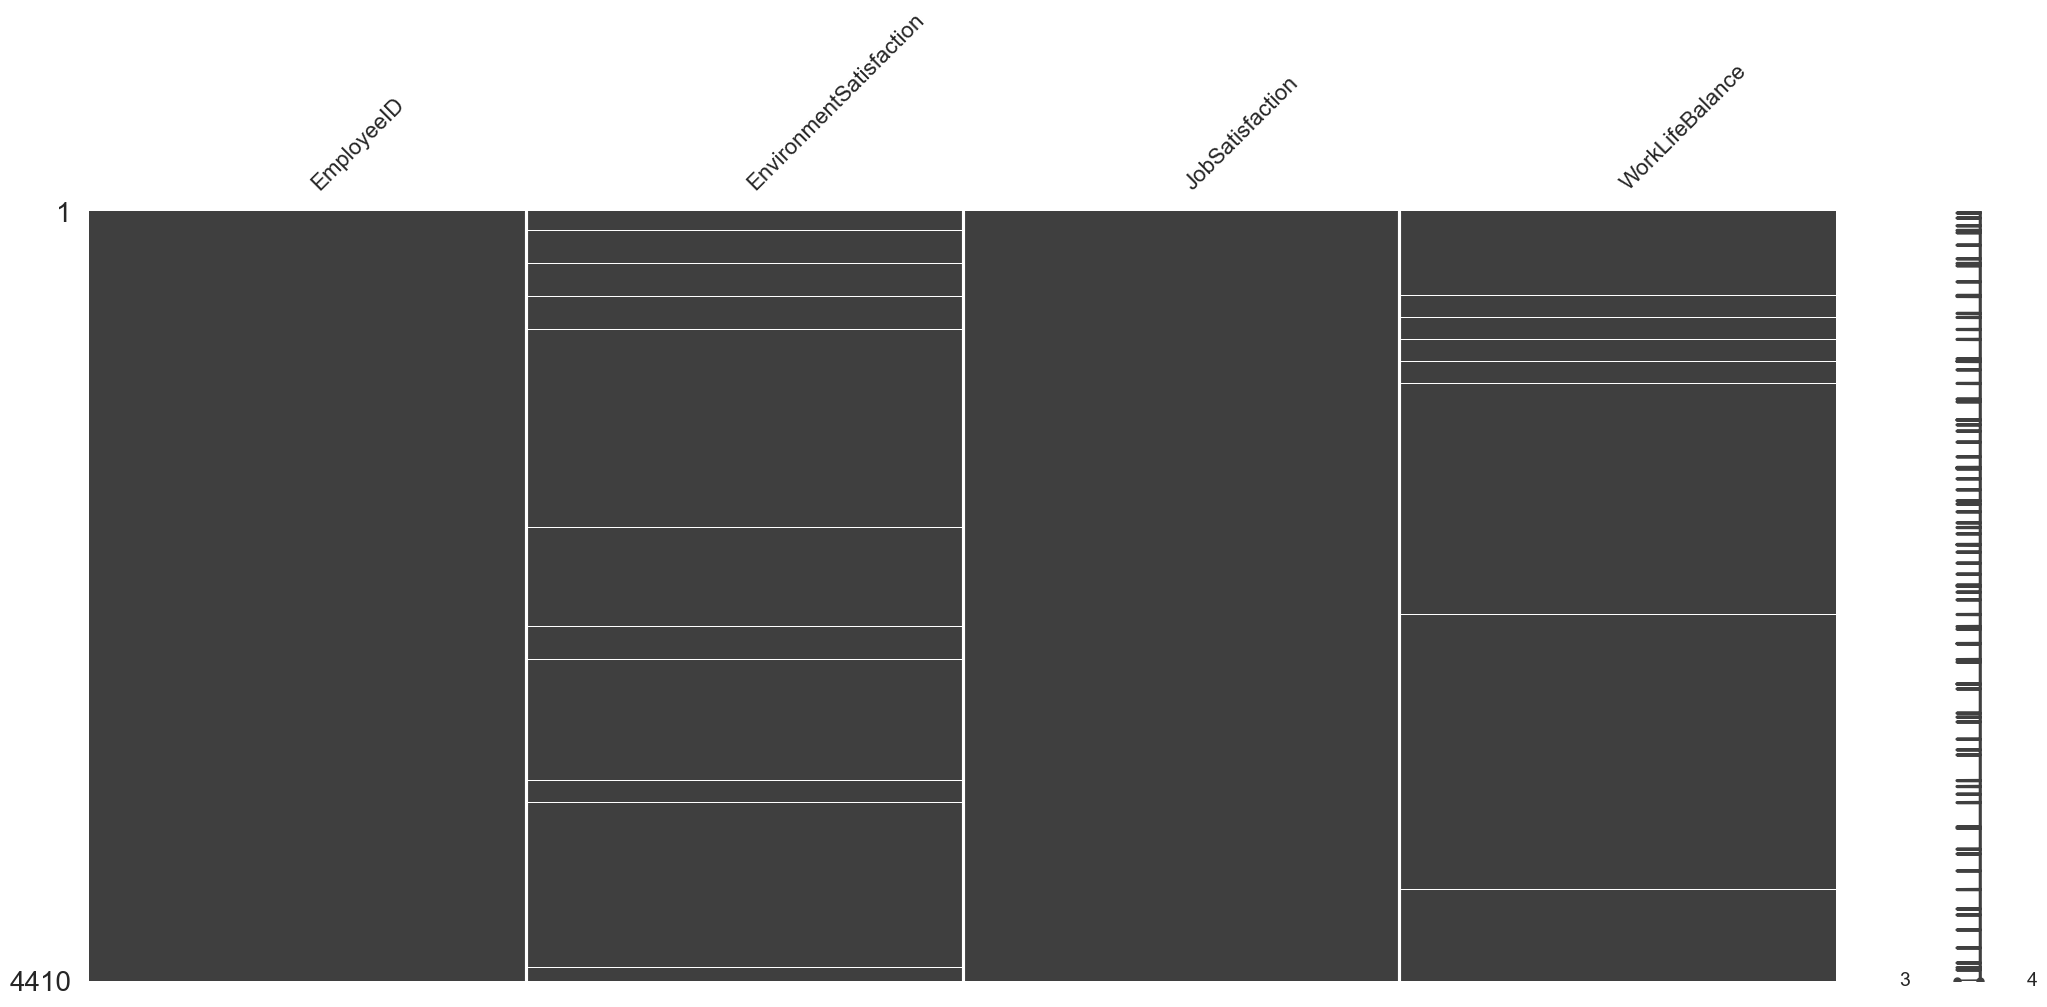

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Visualisation des données manquantes
msno.matrix(employee_survey_data)
plt.show()

# Imputer les valeurs manquantes
# Pour les variables numériques, on remplace les valeurs manquantes par la médiane
numerical_columns = employee_survey_data.select_dtypes(include=np.number).columns
employee_survey_data[numerical_columns] = employee_survey_data[numerical_columns].fillna(employee_survey_data[numerical_columns].median())

# Pour les variables catégorielles, on remplace les valeurs manquantes par le mode imputation
categorical_columns = employee_survey_data.select_dtypes(include='object').columns
employee_survey_data[categorical_columns] = employee_survey_data[categorical_columns].fillna(employee_survey_data[categorical_columns].mode().iloc[0])

# Vérification que toutes les valeurs manquantes ont été traitées
employee_survey_data.isnull().sum()

### Manager Survey Data

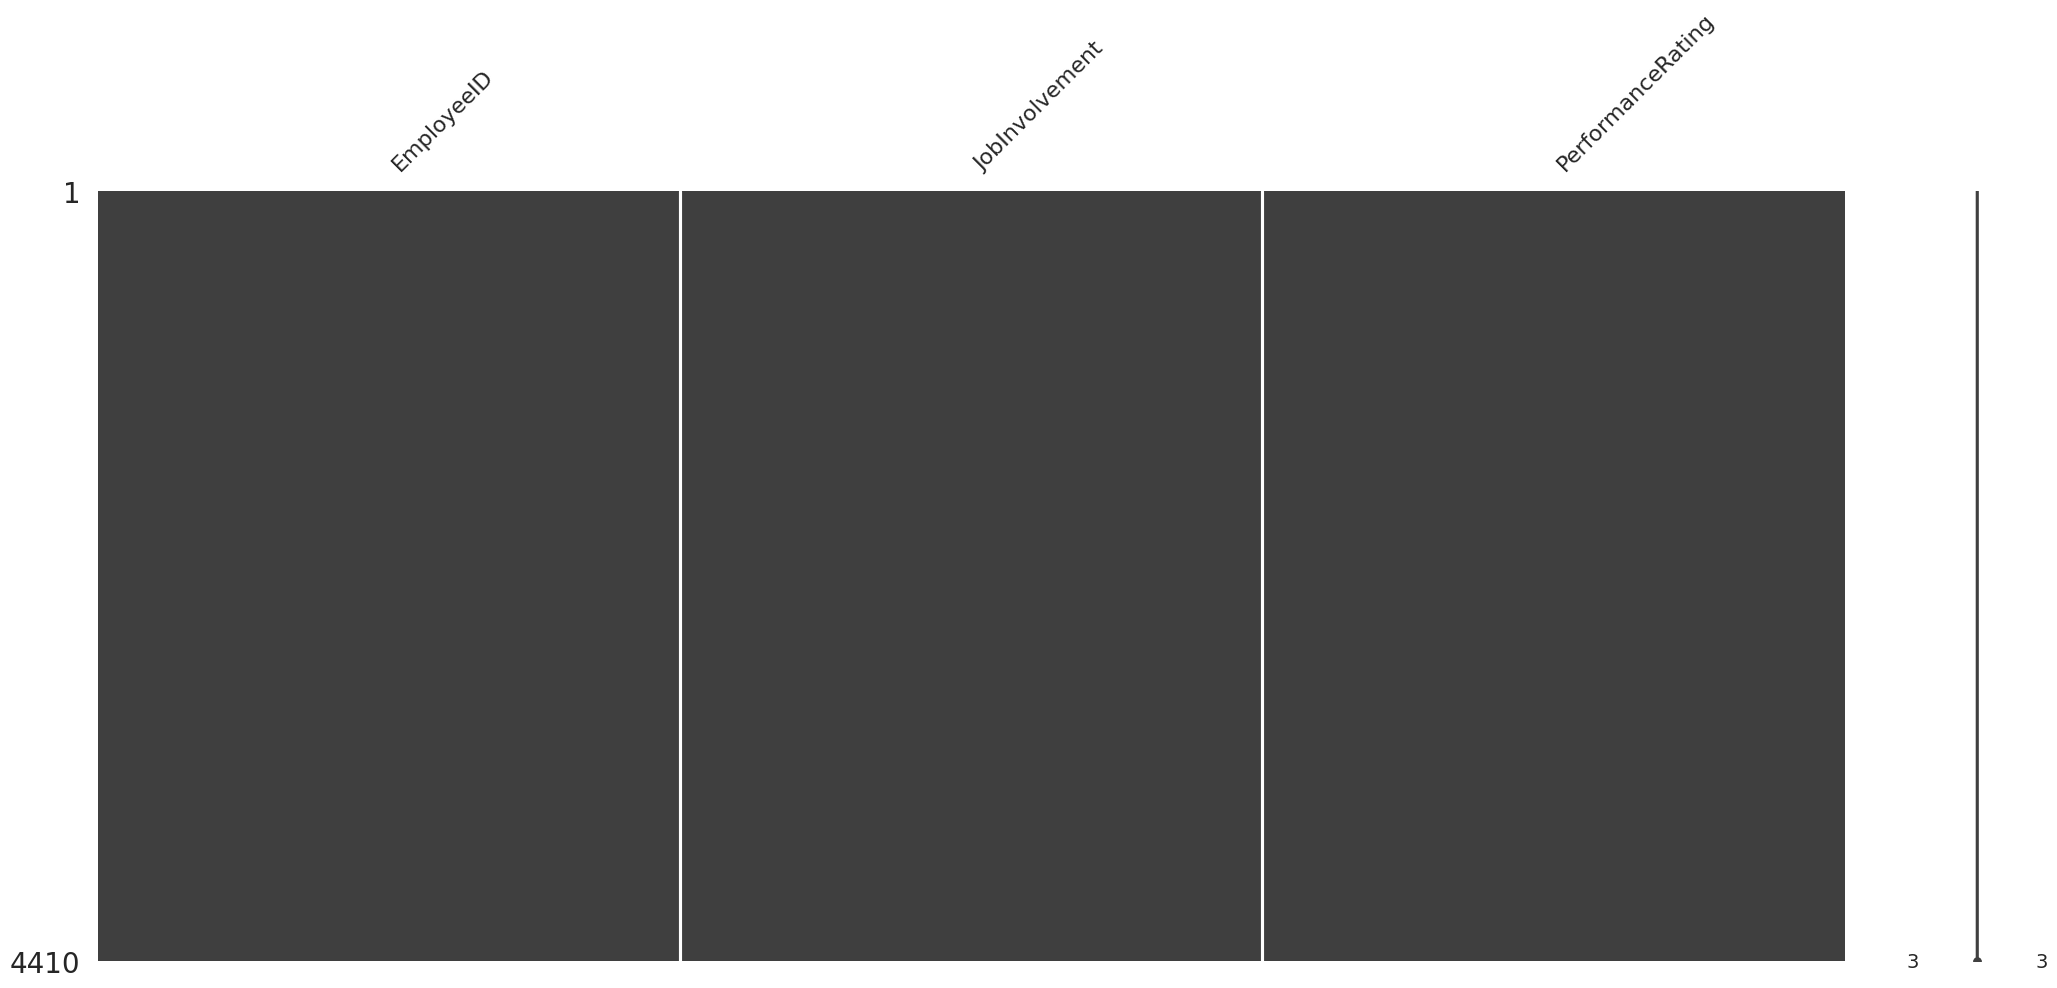

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Visualisation des données manquantes
msno.matrix(manager_survey_data)
plt.show()

# Imputer les valeurs manquantes
# Pour les variables numériques, on remplace les valeurs manquantes par la médiane
numerical_columns = manager_survey_data.select_dtypes(include=np.number).columns
manager_survey_data[numerical_columns] = manager_survey_data[numerical_columns].fillna(manager_survey_data[numerical_columns].median())

# Pour les variables catégorielles, on remplace les valeurs manquantes par le mode imputation
categorical_columns = manager_survey_data.select_dtypes(include='object').columns
manager_survey_data[categorical_columns] = manager_survey_data[categorical_columns].fillna(manager_survey_data[categorical_columns].mode().iloc[0])

# Vérification que toutes les valeurs manquantes ont été traitées
manager_survey_data.isnull().sum()

### In Time Data

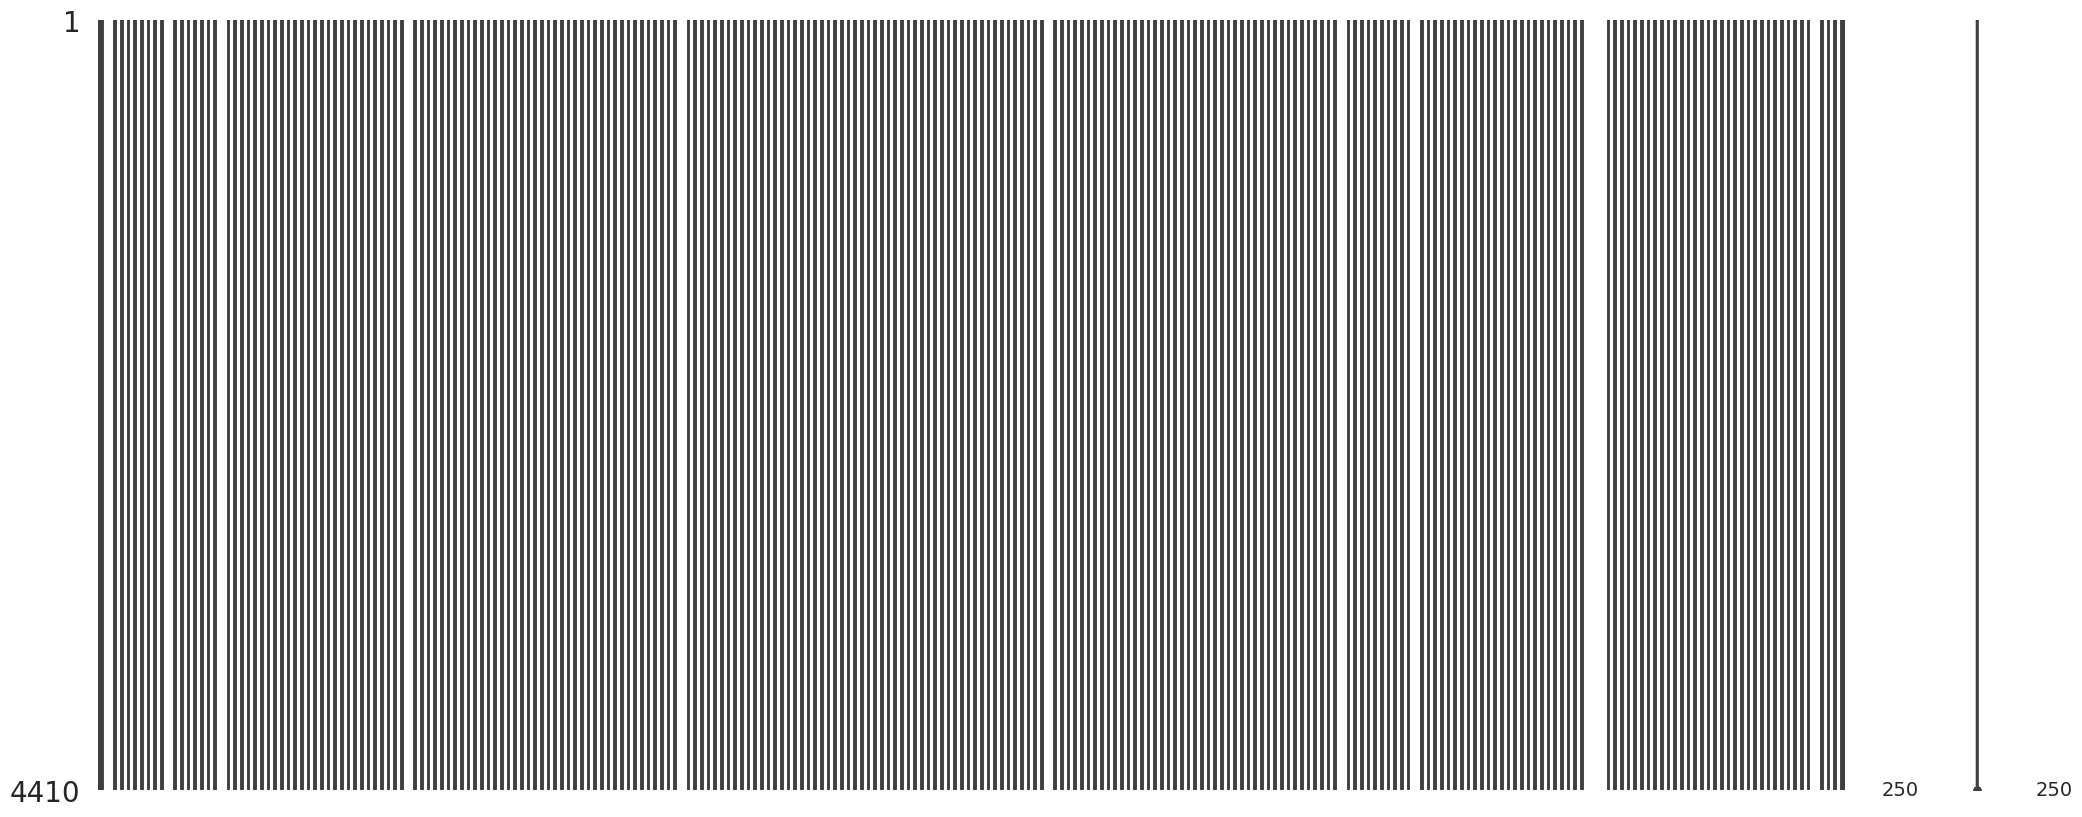

EmployeeID       0
2015-01-01    4410
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    4410
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64

In [ ]:
# Visualisation des données manquantes
msno.matrix(in_time_data)
plt.show()

# Imputer les valeurs manquantes
# Pour les variables numériques, on remplace les valeurs manquantes par la médiane
numerical_columns = in_time_data.select_dtypes(include=np.number).columns
in_time_data[numerical_columns] = in_time_data[numerical_columns].fillna(in_time_data[numerical_columns].median())

# Pour les variables catégorielles, on remplace les valeurs manquantes par le mode imputation
categorical_columns = in_time_data.select_dtypes(include='object').columns
in_time_data[categorical_columns] = in_time_data[categorical_columns].fillna(in_time_data[categorical_columns].mode().iloc[0])

# Vérification que toutes les valeurs manquantes ont été traitées
in_time_data.isnull().sum()

### Out Time Data

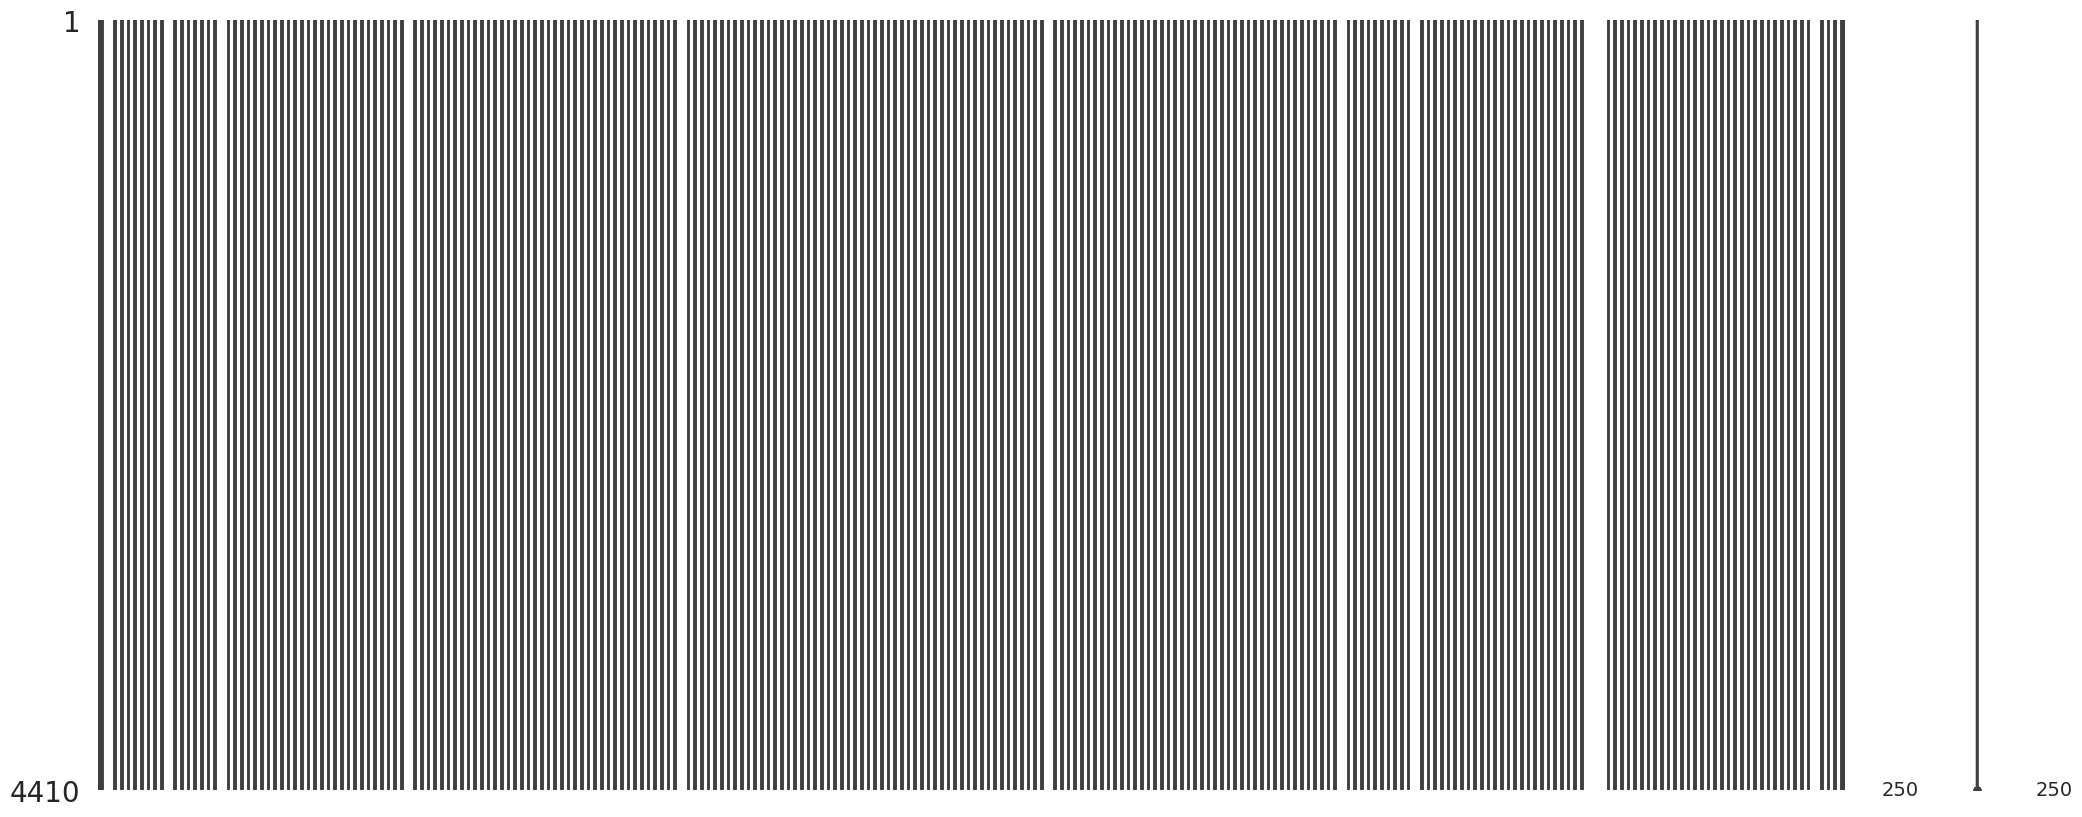

EmployeeID       0
2015-01-01    4410
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    4410
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64

In [ ]:
# Visualisation des données manquantes
msno.matrix(out_time_data)
plt.show()

# Imputer les valeurs manquantes
# Pour les variables numériques, on remplace les valeurs manquantes par la médiane
numerical_columns = out_time_data.select_dtypes(include=np.number).columns
out_time_data[numerical_columns] = out_time_data[numerical_columns].fillna(out_time_data[numerical_columns].median())

# Pour les variables catégorielles, on remplace les valeurs manquantes par le mode imputation
categorical_columns = in_time_data.select_dtypes(include='object').columns
out_time_data[categorical_columns] = out_time_data[categorical_columns].fillna(out_time_data[categorical_columns].mode().iloc[0])

# Vérification que toutes les valeurs manquantes ont été traitées
out_time_data.isnull().sum()

# Pre processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preprocess_data(df,
                    drop_columns=None,
                    transform_time=False,
                    time_aggregation='mean',
                    fill_missing=None,
                    encode_categorical=None,
                    label_column='Attrition',
                    label_mapping=None,
                    scale_columns=None,
                    scaling_method='minmax',
                    fill_missing_with_mean=False):
    """
    Préprocesser les données pour le machine learning.

    Parametres:
    - df (pd.DataFrame): Le DataFrame contenant les données.
    - drop_columns (list): Liste des colonnes à supprimer.
    - transform_time (bool): Si True, transforme les colonnes in/out en une colonne temps moyen ou total.
    - time_aggregation (str): Méthode d'agrégation pour le temps ('mean', 'sum', etc.).
    - fill_missing (dict): Dictionnaire pour remplir les valeurs manquantes par colonne.
    - encode_categorical (dict): Dictionnaire où les clés sont les colonnes à encoder et les valeurs sont des mappings pour les catégories {"valeur": chiffre}.
    - label_column (str): Nom de la colonne à utiliser comme label.
    - label_mapping (dict): Dictionnaire pour mapper les valeurs de la colonne de label (e.g., {'Yes': 1, 'No': 0}).
    - scale_columns (list): Liste des colonnes à normaliser ou standardiser.
    - scaling_method (str): Méthode de mise à l'échelle ('minmax' ou 'standard').
    - fill_missing_with_mean (bool): Si True, remplit les valeurs manquantes avec la moyenne des colonnes après la normalisation.

    Returns:
    - pd.DataFrame: Le DataFrame prétraité.
    """
    df_processed = df.copy()

    # 1. Supprimer les colonnes inutiles
    if drop_columns:
        df_processed.drop(columns=drop_columns, inplace=True, errors='ignore')

    # 2. Transformer les colonnes in/out en temps moyen ou total
    if transform_time:
        time_columns = [col for col in df_processed.columns if col.startswith('In_') or col.startswith('Out_')]
        if time_columns:
            in_columns = [col for col in time_columns if col.startswith('In_')]
            out_columns = [col for col in time_columns if col.startswith('Out_')]

            in_time = df_processed[in_columns].apply(pd.to_datetime, errors='coerce')
            out_time = df_processed[out_columns].apply(pd.to_datetime, errors='coerce')

            # Calculer le temps de présence
            presence_time = (out_time - in_time).apply(lambda x: x.dt.total_seconds() / 3600, axis=1)

            if time_aggregation == 'mean':
                df_processed['AverageTime'] = presence_time.mean(axis=1)
            elif time_aggregation == 'sum':
                df_processed['TotalTime'] = presence_time.sum(axis=1)

            # Supprimer les colonnes in/out originales
            df_processed.drop(columns=time_columns, inplace=True, errors='ignore')

    # 3. Remplir les valeurs manquantes avec une valeur arbitraire
    if fill_missing:
        df_processed.fillna(fill_missing, inplace=True)

    # 4. Encoder les colonnes catégoriques
    if encode_categorical:
        for col, mapping in encode_categorical.items():
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].map(mapping)

    # 5. Mapper la colonne de label
    if label_mapping and label_column in df_processed.columns:
        df_processed[label_column] = df_processed[label_column].map(label_mapping)

    # 6. Normalisation/Standardisation
    if scale_columns:
        scaler = MinMaxScaler() if scaling_method == 'minmax' else StandardScaler()
        df_processed[scale_columns] = scaler.fit_transform(df_processed[scale_columns])

    # 7. Remplir les valeurs manquantes avec la moyenne des colonnes (après encodage et normalisation)
    if fill_missing_with_mean:
        numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            if df_processed[col].isna().sum() > 0:
                df_processed[col].fillna(df_processed[col].mean(), inplace=True)

    return df_processed

# Dataset repartition

In [ ]:
def split_dataset(df,
                  target_column,
                  train_size=0.7,
                  test_size=0.3,
                  validation_size=None,
                  stratify=False):
    """
    Divise un DataFrame en jeux d'entraînement, de test et de validation (optionnel).

    Parameters:
    - df (pd.DataFrame): Le DataFrame à diviser.
    - target_column (str): Le nom de la colonne cible pour la stratification.
    - train_size (float): Pourcentage des données pour le jeu d'entraînement (par défaut 0.7).
    - test_size (float): Pourcentage des données pour le jeu de test (par défaut 0.3).
    - validation_size (float, optional): Pourcentage des données pour le jeu de validation. Si None, pas de validation.
    - stratify (bool): Si True, stratifie les données en fonction de la colonne cible.

    Returns:
    - dict: Un dictionnaire contenant les jeux d'entraînement, de test et éventuellement de validation.
    """
    if train_size + test_size + (validation_size or 0) > 1.0:
        raise ValueError("La somme de train_size, test_size et validation_size ne doit pas dépasser 1.0")

    # Séparer les features et la cible
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Stratification si activée
    stratify_labels = y if stratify else None

    # Division en entraînement et test (et validation si nécessaire)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, train_size=train_size, stratify=stratify_labels, random_state=42
    )

    if validation_size:
        adjusted_test_size = test_size / (test_size + validation_size)  # Ajuster le pourcentage pour la division finale
        stratify_temp = y_temp if stratify else None

        X_test, X_val, y_test, y_val = train_test_split(
            X_temp, y_temp, test_size=adjusted_test_size, stratify=stratify_temp, random_state=42
        )

        return {
            "train": (X_train, y_train),
            "test": (X_test, y_test),
            "validation": (X_val, y_val)
        }

    return {
        "train": (X_train, y_train),
        "test": (X_temp, y_temp)
    }


# Bibliographie
## Sources méthodologiques et théoriques :
références traitant des bases théoriques et des modèles méthodologiques employés.

## Sources sur les aspects techniques :
ouvrages ou articles décrivant les techniques spécifiques utilisées.

## Sources éthiques et sociétales :
ressources relatives aux normes et aux enjeux éthiques dans votre domaine.

## Sources spécifiques au projet :
articles, études de cas ou rapports ayant directement inspiré ou orienté vos choix.